### AI-Powered Real-Time News Effects on Stock Market Changes and Sentiment Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer

# Hide warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the dataset
file_path = "news_articles_and_stock_2000.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Title,Summary,Published Date,URL,Sentiment Label,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Absolute Change
0,2 Monster Stocks to Hold for the Next 5 Years,One of the best ways to make money in the stoc...,20250208T123900,https://www.fool.com/investing/2025/02/08/2-mo...,Bullish,193.160004,193.860001,190.440002,190.600006,3805400,0.0,0,ABBV,-2.559998
1,"Bill Gates Says Steve Jobs Once Told Him, I Wi...",Bill Gates earlier this week disclosed that th...,20250208T110218,https://www.benzinga.com/tech/25/02/43577868/b...,Somewhat-Bullish,389.000000,390.529999,385.359985,385.980011,2437400,0.0,0,ACN,-3.019989
2,"If You Bought 1 Share of Apple at Its IPO, Her...",Apple ( NASDAQ: AAPL ) has been a public compa...,20250208T100800,https://www.fool.com/investing/2025/02/08/if-y...,Somewhat-Bullish,436.239990,441.000000,432.410004,433.070007,2692900,0.0,0,ADBE,-3.169983
3,Apple Stock Jumps on Artificial Intelligence ...,"As Nvidia stock went down, Apple stock went up.",20250208T090500,https://www.fool.com/investing/2025/02/08/appl...,Somewhat-Bullish,191.050003,191.179993,183.240005,185.339996,49246800,0.0,0,GOOGL,-5.710007
4,Gaming Market Size to Grow by USD 100.8 Billio...,"NEW YORK, Feb. 7, 2025 /PRNewswire/ -- Report ...",20250208T040700,https://www.benzinga.com/pressreleases/25/02/n...,Bullish,192.740005,193.014999,185.100006,187.139999,29517100,0.0,0,GOOG,-5.600006


In [3]:

# Display basic information
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2000 non-null   object 
 1   Summary           2000 non-null   object 
 2   Published Date    2000 non-null   object 
 3   URL               2000 non-null   object 
 4   Sentiment Label   2000 non-null   object 
 5   Open              2001 non-null   float64
 6   High              2001 non-null   float64
 7   Low               2001 non-null   float64
 8   Close             2001 non-null   float64
 9   Volume            2001 non-null   int64  
 10  Dividends         2001 non-null   float64
 11  Stock Splits      2001 non-null   int64  
 12  Ticker            2001 non-null   object 
 13  Absolute Change   2001 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 219.0+ KB
None


In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Title               1
Summary             1
Published Date      1
URL                 1
Sentiment Label     1
Open                0
High                0
Low                 0
Close               0
Volume              0
Dividends           0
Stock Splits        0
Ticker              0
Absolute Change     0
dtype: int64


Handle Missing or Corrupt Data

In [5]:
# Drop rows with missing values if necessary
df.dropna(inplace=True)

# Fill missing values with appropriate statistics
df.fillna({
    "Open": df["Open"].median(),
    "High": df["High"].median(),
    "Low": df["Low"].median(),
    "Close": df["Close"].median(),
    "Volume": df["Volume"].median(),
    "Dividends": df["Dividends"].median(),
    "Stock Splits": df["Stock Splits"].mode()[0],
}, inplace=True)

Check for Duplicates

In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
# Convert 'Published Date' to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'])

## EDA 

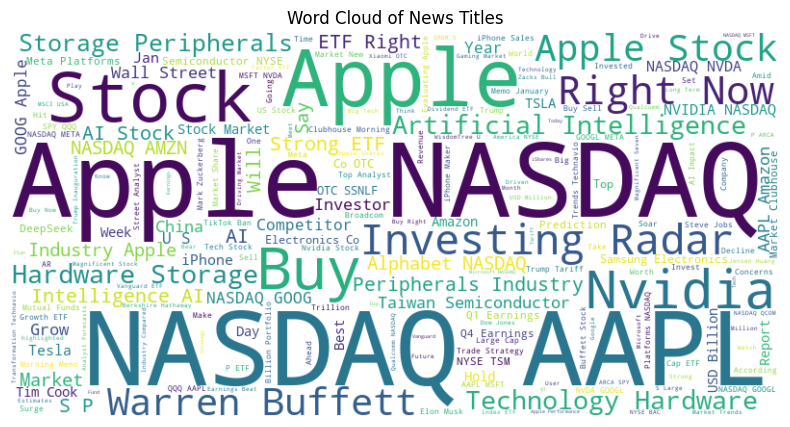

In [16]:
# Word Cloud for News Titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Titles")
plt.show()

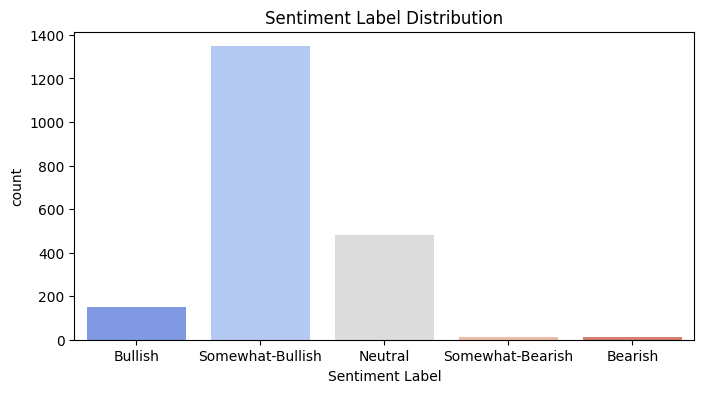

In [17]:
# Sentiment Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sentiment Label', palette='coolwarm')
plt.title("Sentiment Label Distribution")
plt.show()

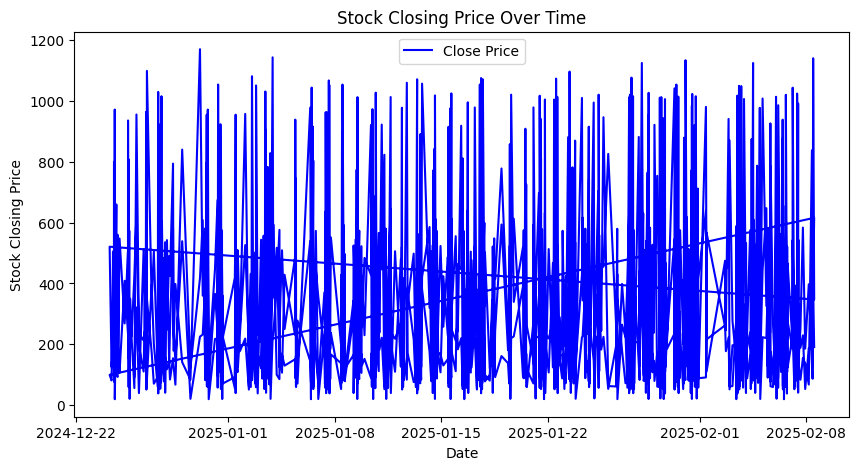

In [18]:
# Stock Price Trends
plt.figure(figsize=(10, 5))
plt.plot(df['Published Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

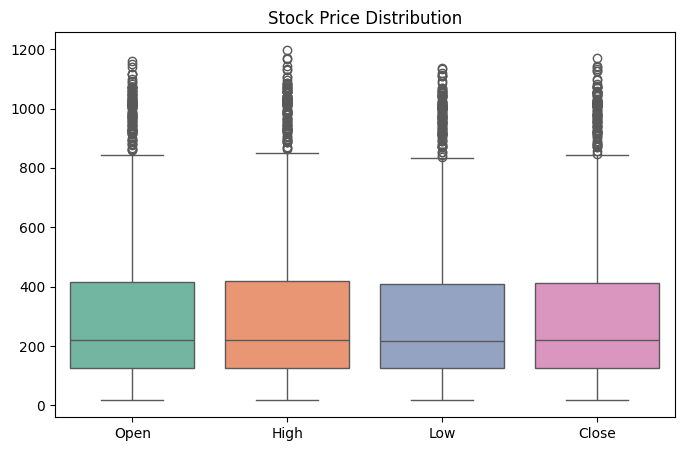

In [19]:
# Box Plot of Stock Prices
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette='Set2')
plt.title("Stock Price Distribution")
plt.show()

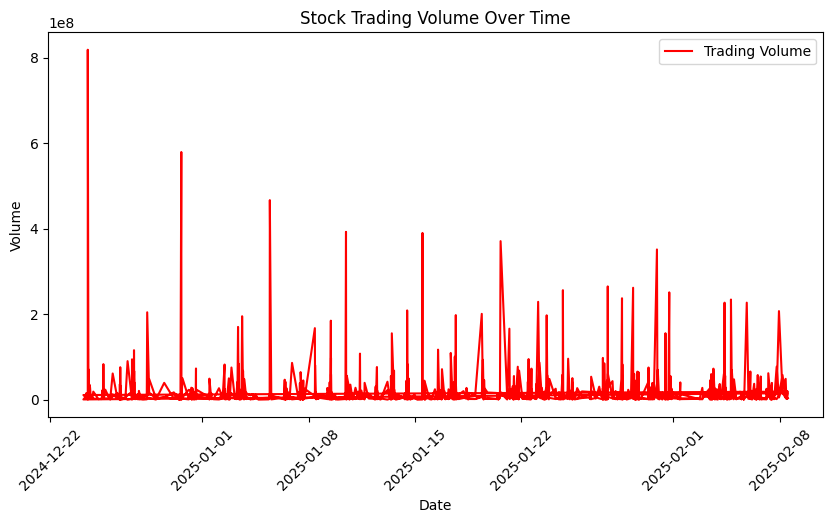

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(df['Published Date'], df['Volume'], label='Trading Volume', color='red')

plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Over Time")

# Format x-axis to show fewer dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.xticks(rotation=45)
plt.legend()
plt.show()


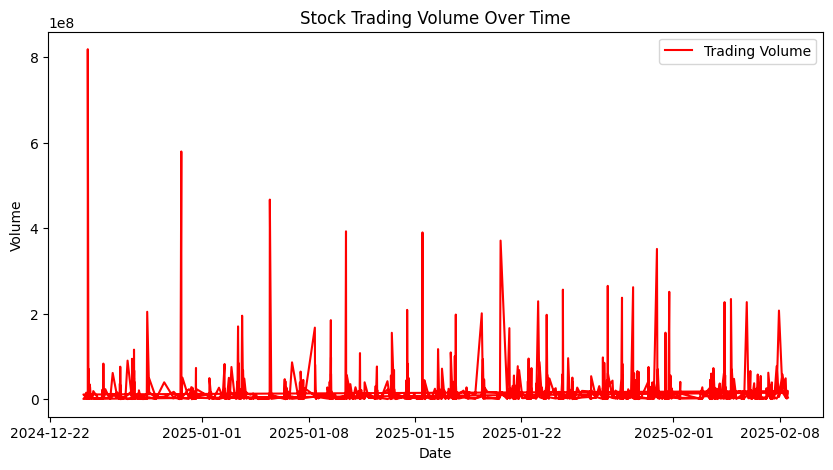

In [21]:
# Time Series Analysis of Stock Volume
plt.figure(figsize=(10, 5))
plt.plot(df['Published Date'], df['Volume'], label='Trading Volume', color='red')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Over Time")
plt.legend()
plt.show()